<a href="https://www.kaggle.com/code/fareselmenshawii/optimized-neural-network-from-scratch?scriptVersionId=117154120" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 style='background:#f6abb6;padding-top:17px; border:0; color:black'><center>Content</center></h1> 

[1. Overview](#1)
    
[2. Imports](#2)
    
[3. Data Exploration](#3)    
    
[4. Data Preprocessing](#4)    

[5. Optimization Algorithms](#5)     

[6. Model Implementation](#6)     

[7. Evaluation](#7)
    
[8. Thank You](#8)
    
 <a id="2"></a>
<h1 style='background:#f6abb6;padding-top:17px; border:0; color:black'><center>Overview</center></h1> 



# Overview
    
**Previously we've implemented [A Neural Network From Scratch](https://www.kaggle.com/code/fareselmenshawii/neural-network-from-scratch) in this notebook we'll optimizing this neural network to get better results**
    
**Let's get started !**

<div class="table-of-contents" style="background-color:#f6abb6; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1 style="color:#000000;">TOC</h1>
  <ol>
    <li><a href="#1" style="color: #000000;">1. Overview</a></li>
    <li><a href="#2" style="color: #000000;">2. Imports</a></li>
    <li><a href="#3" style="color: #000000;">3. Data Exploration</a></li>
    <li><a href="#4" style="color: #000000;">4. Data Preprocessing</a></li>
    <li><a href="#5" style="color: #000000;">5. Optimization Algorithms</a></li>
    <li><a href="#6" style="color: #000000;">6. Model Implementation</a></li>
   <li><a href="#7" style="color: #000000;">7. Evaluation</a></li> 
   <li><a href="#8" style="color: #000000;">8. Thank You</a></li>    
  </ol>
</div>

<a id="1"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Overview</center></h1>

# Overview
    
**Previously we've implemented [A Neural Network From Scratch](https://www.kaggle.com/code/fareselmenshawii/neural-network-from-scratch) in this notebook we'll optimizing this neural network to get better results**
    
**Let's get started !**

<a id="2"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Imports</center></h1>

# Imports

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

<a id="3"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Exploration</center></h1>

# Data Exploration

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/data.csv')
                 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [4]:
px.histogram(data_frame=df,x=df.area_mean,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [5]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [6]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [7]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [8]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [9]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [10]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [11]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


<a id="4"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Preprocessing</center></h1>

# Data Preprocessing

In [12]:
df.drop('id', axis=1, inplace=True) #drop redundant columns

In [13]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [15]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Get highly correlated features with the target**

**As mentioned in this [notebook](https://www.kaggle.com/code/fareselmenshawii/introduction-to-feature-selection) Selecting highly correlated features gives better results**

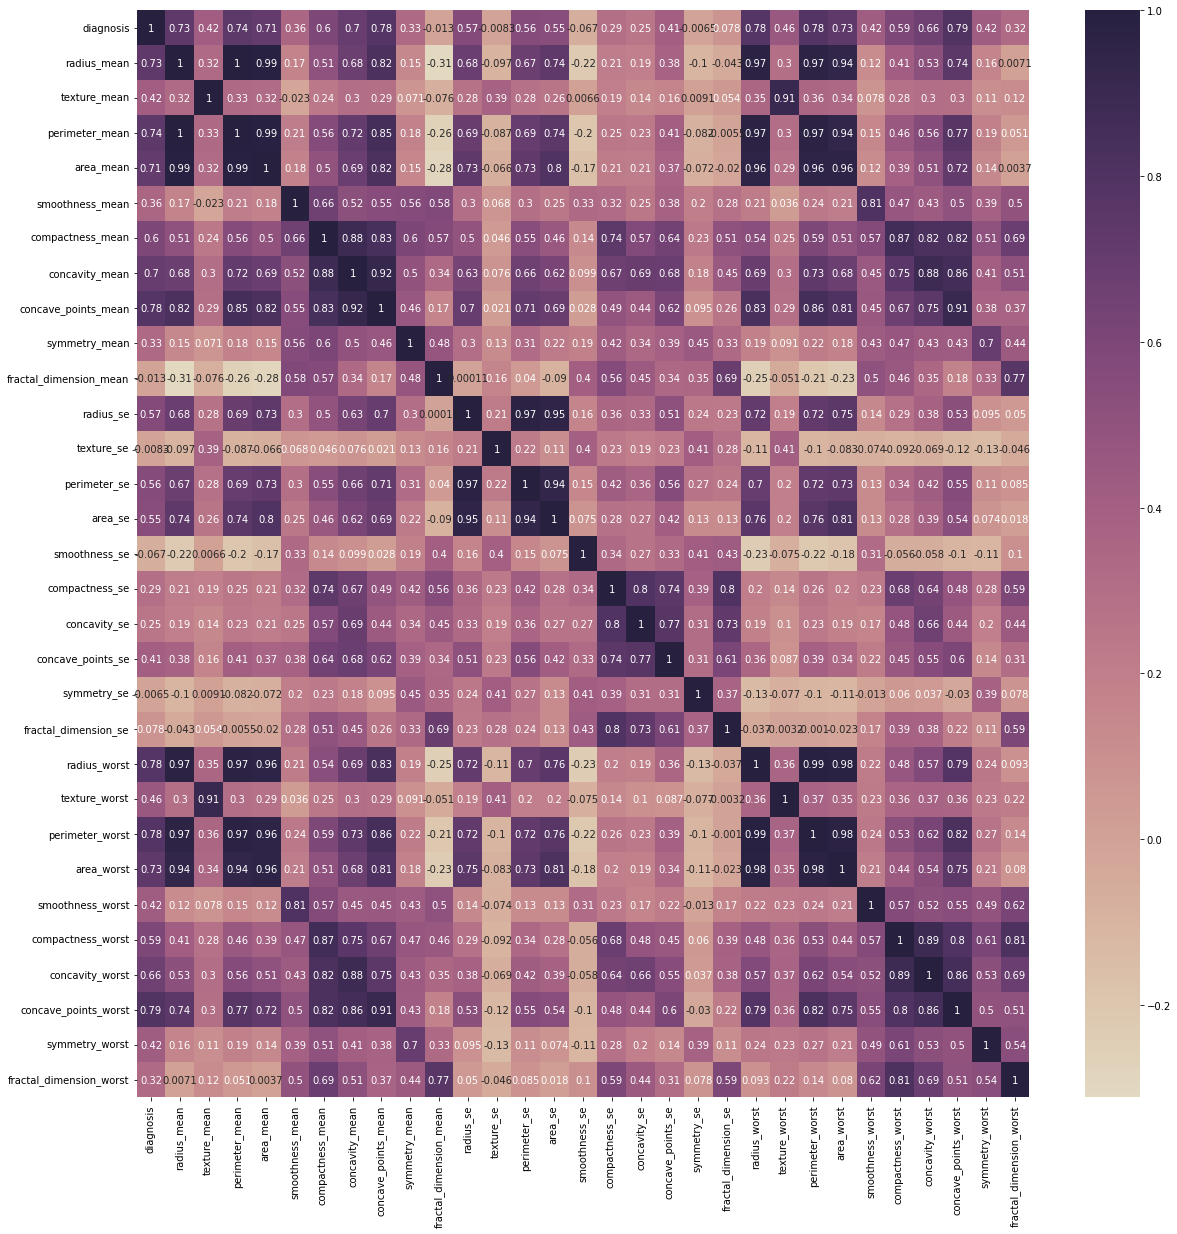

In [16]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('diagnosis')


**Define data and labels**

In [17]:
X = df[names]
y = df['diagnosis'].values

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

scaler.transform(X_train) #transform training data
scaler.transform(X_test) #transform validation data

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

<a id="5"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Optimization Algorithms</center></h1>

# Optimization Algorithms

## RMSProp

**RMSProp uses  an exponential average of the square of the gradients**

**The RMSProp update rule is, for $l = 1, ..., L$:**

$$
s_{dW^{[l]}} = \beta s_{dW^{[l]}} + (1 - \beta) (\frac{\partial \mathcal{J} }{\partial b^{[l]} })^2 \\
s_{db^{[l]}} = \beta s_{db^{[l]}} + (1 - \beta) (\frac{\partial \mathcal{J} }{\partial b^{[l]} })^2 \\
$$



$$W^{[l]} = W^{[l]} - \alpha \frac{{dW^{[l]}}}{\sqrt{s^{}_{dW^{[l]}}} + \varepsilon}$$

$$b^{[l]} = b^{[l]} - \alpha \frac{{db^{[l]}}}{\sqrt{s^{}_{db^{[l]}}} + \varepsilon}$$

## Momentum

**Momentum takes into account the past gradients to smooth out the update.By using the exponentially weighted average of the gradient on previous steps**

**The momentum update rule is, for $l = 1, ..., L$:**


$$v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]}$$

$$v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]}$$ 



$$
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}$$

$$b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}} 
$$


## Adam

**Adam calculates an exponentially weighted average of past gradients and it calculates an exponentially weighted average of the squares of the past gradients. Adam utilizes bias correction It updates parameters in a direction based on combining both information**


**The update rule is, for $l = 1, ..., L$:** 

$$
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{}_{dW^{[l]}}}{\sqrt{s^{}_{dW^{[l]}}} + \varepsilon}
$$

****

$$
v_{db^{[l]}} = \beta_1 v_{db^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial b^{[l]} } \\
v^{}_{db^{[l]}} = \frac{v_{db^{[l]}}}{1 - (\beta_1)^t} \\
s_{db^{[l]}} = \beta_2 s_{db^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial b^{[l]} })^2 \\
s^{}_{db^{[l]}} = \frac{s_{db^{[l]}}}{1 - (\beta_2)^t} \\
b^{[l]} = b^{[l]} - \alpha \frac{v^{}_{db^{[l]}}}{\sqrt{s^{}_{db^{[l]}}} + \varepsilon}
$$


<a id="6"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Model Implementation</center></h1>

# Model Implementation

## Activation functions 

### We have  previously dicussed activation functions in this [notebook](https://www.kaggle.com/code/fareselmenshawii/neural-network-from-scratch)

In [19]:
def relu(Z):
    """
    Implement the ReLU function.

    Arguments:
    Z -- Output of the linear layer

    Returns:
    A -- Post-activation parameter
    cache -- used for backpropagation
    """
    A = np.maximum(0,Z)
    cache = Z 
    return A, cache



def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single ReLU unit.

    Arguments:
    dA -- post-activation gradient
    cache -- 'Z'  stored for backpropagation

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    Z = cache
    dZ = np.array(dA, copy=True) 
    # When z <= 0, dz is equal to 0 as well. 
    dZ[Z <= 0] = 0
    
    return dZ


def sigmoid(Z):
    """
    Implement the Sigmoid function.

    Arguments:
    Z -- Output of the linear layer

    Returns:
    A -- Post-activation parameter
    cache -- a python dictionary containing "A" for backpropagation
    """
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache



def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single sigmoid unit.

    Arguments:
    dA -- post-activation gradient
    cache -- 'Z' stored during forward pass

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ

In [20]:
class NeuralNetwork:
    def __init__(self, layer_dimensions=[25,16,16,1],learning_rate=0.00001):
        """
        Parameters
        ----------

        layer_dimensions : list
            python array (list) containing the dimensions of each layer in our network
                
        learning_rate :  float
            learning rate of the network.

        """
        self.layer_dimensions = layer_dimensions
        self.learning_rate = learning_rate
        
        
    def initialize_parameters(self):
        """initializes the parameters"""
        np.random.seed(3)
        self.n_layers =  len(self.layer_dimensions)
        for l in range(1, self.n_layers):
            vars(self)[f'W{l}'] = np.random.randn(self.layer_dimensions[l], self.layer_dimensions[l-1]) * 0.01
            vars(self)[f'b{l}'] = np.zeros((self.layer_dimensions[l], 1))

    
    def _linear_forward(self, A, W, b):
        """
        Implements the linear part of a layer's forward propagation.

        Arguments:
        A -- activations from previous layer (size of previous layer, number of examples)
        W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
        b -- bias vector, numpy array of shape (size of the current layer, 1)

        Returns:
        Z -- pre-activation parameter 
        cache -- a python tuple containing "A", "W" and "b"  for backpropagation
        """
        # Compute Z
        Z = np.dot(W,A) + b
        # Cache  A, W , b for backpropagation
        cache = (A, W, b)
        return Z, cache
    
    def _forward_propagation(self,A_prev ,W ,b , activation):
        """
        Implements the forward propagation for a network layer

        Arguments:
        A_prev -- activations from previous layer, shape : (size of previous layer, number of examples)
        W -- shape : (size of current layer, size of previous layer)
        b -- shape : (size of the current layer, 1)
        activation -- the activation to be used in this layer

        Returns:
        A -- the output of the activation function 
        cache -- a python tuple containing "linear_cache" and "activation_cache" for backpropagation
        """
        
        # Compute Z using the function defined above, compute A using the activaiton function
        if activation == "sigmoid":
            Z, linear_cache = self._linear_forward(A_prev, W, b)
            A, activation_cache = sigmoid(Z) 
        elif activation == "relu":
            Z, linear_cache = self._linear_forward(A_prev, W, b) 
            A, activation_cache = relu(Z) 
            #Store the cache for backpropagation
        cache = (linear_cache, activation_cache)
        return A, cache
    
    
    def forward_propagation(self, X):
        """
        Implements forward propagation for the whole network

        Arguments:
        X --  shape : (input size, number of examples)

        Returns:
        AL -- last post-activation value
        caches -- list of cache returned by _forward_propagation helper function
        """
        # Initialize empty list to store caches
        caches = []
        # Set initial A to X 
        A = X
        L =  self.n_layers -1
        for l in range(1, L):
            A_prev = A 
            # Forward propagate through the network except the last layer
            A, cache = self._forward_propagation(A_prev, vars(self)['W' + str(l)], vars(self)['b' + str(l)], "relu")
            caches.append(cache)
        # Forward propagate through the output layer and get the predictions
        predictions, cache = self._forward_propagation(A, vars(self)['W' + str(L)], vars(self)['b' + str(L)], "sigmoid")
        # Append the cache to caches list recall that cache will be (linear_cache, activation_cache)
        caches.append(cache)

        return predictions, caches
    
    def compute_cost(self, predictions, y):
        """
        Implements the cost function 

        Arguments:
        predictions -- The model predictions, shape : (1, number of examples)
        y -- The true values, shape : (1, number of examples)

        Returns:
        cost -- cross-entropy cost
        """
        # Get number of training examples
        m = y.shape[0]
        # Compute cost we're adding small epsilon for numeric stability
        cost = (-1/m) * (np.dot(y, np.log(predictions+1e-9).T) + np.dot((1-y), np.log(1-predictions+1e-9).T))
        # squeeze the cost to set it into the correct shape 
        cost = np.squeeze(cost)
        return cost   
        
    def _linear_backward(self, dZ, cache):
        """
        Implements the linear portion of backward propagation 

        Arguments:
        dZ -- Gradient of the cost with respect to the linear output of the current layer 
        cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

        Returns:
        dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
        dW -- Gradient of the cost with respect to W (current layer l), same shape as W
        db -- Gradient of the cost with respect to b (current layer l), same shape as b
        """
        # Get the cache from forward propagation
        A_prev, W, b = cache
        # Get number of training examples
        m = A_prev.shape[1]
        # Compute gradients for W, b and A
        dW = (1/m) * np.dot(dZ, A_prev.T)
        db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T,dZ)
        return dA_prev, dW, db
    
            
    def _back_propagation(self, dA, cache, activation):
        """
        Implements the backward propagation for a single layer.

        Arguments:
        dA -- post-activation gradient for current layer l 
        cache -- tuple of values (linear_cache, activation_cache) 
        activation -- the activation to be used in this layer

        Returns:
        dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
        dW -- Gradient of the cost with respect to W (current layer l), same shape as W
        db -- Gradient of the cost with respect to b (current layer l), same shape as b
        """
        # get the cache from forward propagation and activation derivates function
        linear_cache, activation_cache = cache
        # compute gradients for Z depending on the activation function
        if activation == "relu":
            dZ = relu_backward(dA, activation_cache)

        elif activation == "sigmoid":
            dZ = sigmoid_backward(dA, activation_cache)
        # Compute gradients for W, b and A 
        dA_prev, dW, db = self._linear_backward(dZ, linear_cache)
        return dA_prev, dW, db

    
    def back_propagation(self, predictions, Y, caches):
        """
        Implements the backward propagation for the NeuralNetwork

        Arguments:
        Prediction --  output of the forward propagation 
        Y -- true label
        caches -- list of caches
        """
        L =  self.n_layers - 1
        # Get number of examples
        m = predictions.shape[1]
        Y = Y.reshape(predictions.shape) 
        # Initializing the backpropagation we're adding a small epsilon for numeric stability 
        dAL = - (np.divide(Y, predictions+1e-9) - np.divide(1 - Y, 1 - predictions+1e-9))
        current_cache = caches[L-1] # Last Layer
        # Compute gradients of the predictions
        vars(self)[f'dA{L-1}'], vars(self)[f'dW{L}'], vars(self)[f'db{L}'] = self._back_propagation(dAL, current_cache, "sigmoid")
        for l in reversed(range(L-1)):
            # update the cache
            current_cache = caches[l]
            # compute gradients of the network layers 
            vars(self)[f'dA{l}'] , vars(self)[f'dW{l+1}'], vars(self)[f'db{l+1}'] = self._back_propagation(vars(self)[f'dA{l + 1}'], current_cache, activation = "relu")
            

    def momentum(self,beta=0.9):
        """
        Update parameters using Momentum
        
        Arguments:
        beta -- the momentum hyperparameter, scalar
        """
        L = self.n_layers - 1
        for l in range(L):
            vars(self)[f'vdW{l+1}'] = np.zeros((vars(self)[f'W{l+1}'].shape[0], vars(self)[f'W{l+1}'].shape[1]))
            vars(self)[f'vdb{l+1}'] = np.zeros((vars(self)[f'b{l+1}'].shape[0], vars(self)[f'b{l+1}'].shape[1]))
            
        for l in range(L):
            vars(self)[f'vdW{l+1}'] = beta * vars(self)[f'vdW{l+1}'] + (1-beta) * vars(self)[f'dW{l+1}']
            vars(self)[f'vdb{l+1}'] = beta * vars(self)[f'vdb{l+1}'] + (1-beta) * vars(self)[f'db{l+1}']
            
            
            vars(self)[f'W{l+1}'] = vars(self)[f'W{l+1}'] - self.learning_rate*vars(self)[f'vdW{l+1}']
            vars(self)[f'b{l+1}'] = vars(self)[f'b{l+1}'] - self.learning_rate*vars(self)[f'vdb{l+1}']
       
    
    def RMSProp(self,beta=0.9):
        
        """
        Update parameters using RMSProp
        
        Arguments:
        beta -- the momentum hyperparameter, scalar
        """
        L = self.n_layers -1
        for l in range(L):
            vars(self)[f'sdW{l+1}'] = np.zeros((vars(self)[f'W{l+1}'].shape[0], vars(self)[f'W{l+1}'].shape[1]))
            vars(self)[f'sdb{l+1}'] = np.zeros((vars(self)[f'b{l+1}'].shape[0], vars(self)[f'b{l+1}'].shape[1]))
                
            
        for l in range(L):
            vars(self)[f'sdW{l+1}'] = beta * vars(self)[f'sdW{l+1}'] + (1-beta) * np.square(vars(self)[f'dW{l+1}'])
            vars(self)[f'sdb{l+1}'] = beta * vars(self)[f'sdb{l+1}'] + (1-beta) * np.square(vars(self)[f'db{l+1}'])
            
            vars(self)[f'sdW{l+1}'] = vars(self)[f'sdW{l+1}']/(1-beta**2)
            vars(self)[f'sdb{l+1}'] = vars(self)[f'sdb{l+1}']/(1-beta**2)

        
            vars(self)[f'W{l+1}'] = vars(self)[f'W{l+1}'] - self.learning_rate*vars(self)[f'dW{l+1}'] / np.sqrt(vars(self)[f'sdW{l+1}']+1e-9)
            vars(self)[f'b{l+1}'] = vars(self)[f'b{l+1}'] - self.learning_rate*vars(self)[f'db{l+1}'] / np.sqrt(vars(self)[f'sdb{l+1}']+1e-9)

                
    def Adam(self,beta1=0.9, beta2=0.999):

        """
        Update parameters using Adam
        
        Arguments:
        beta1 -- Exponential decay hyperparameter for the first moment estimates 
        beta2 -- Exponential decay hyperparameter for the second moment estimates 
        """

        L = self.n_layers - 1
        for l in range(L):
            vars(self)[f'vdW{l+1}'] = np.zeros((vars(self)[f'W{l+1}'].shape[0], vars(self)[f'W{l+1}'].shape[1]))
            vars(self)[f'vdb{l+1}'] = np.zeros((vars(self)[f'b{l+1}'].shape[0], vars(self)[f'b{l+1}'].shape[1]))     
            vars(self)[f'sdW{l+1}'] = np.zeros((vars(self)[f'W{l+1}'].shape[0], vars(self)[f'W{l+1}'].shape[1]))
            vars(self)[f'sdb{l+1}'] = np.zeros((vars(self)[f'b{l+1}'].shape[0], vars(self)[f'b{l+1}'].shape[1]))
            
        for l in range(L):
            vars(self)[f'vdW{l+1}'] = beta1 * vars(self)[f'vdW{l+1}'] + (1-beta1) * vars(self)[f'dW{l+1}']
            vars(self)[f'vdb{l+1}'] = beta1 * vars(self)[f'vdb{l+1}'] + (1-beta1) * vars(self)[f'db{l+1}']
            
            vars(self)[f'vdW{l+1}'] = vars(self)[f'vdW{l+1}']/(1-beta1**2)
            vars(self)[f'vdb{l+1}'] = vars(self)[f'vdb{l+1}']/(1-beta1**2)
            
            
            vars(self)[f'sdW{l+1}'] = beta2 * vars(self)[f'sdW{l+1}'] + (1-beta2) * np.square(vars(self)[f'dW{l+1}'])
            vars(self)[f'sdb{l+1}'] = beta2 * vars(self)[f'sdb{l+1}'] + (1-beta2) * np.square(vars(self)[f'db{l+1}'])
            
            vars(self)[f'sdW{l+1}'] = vars(self)[f'sdW{l+1}']/(1-beta2**2)
            vars(self)[f'sdb{l+1}'] = vars(self)[f'sdb{l+1}']/(1-beta2**2)

            vars(self)[f'W{l+1}'] = vars(self)[f'W{l+1}'] - self.learning_rate*vars(self)[f'vdW{l+1}'] / np.sqrt(vars(self)[f'sdW{l+1}']+1e-9)
            vars(self)[f'b{l+1}'] = vars(self)[f'b{l+1}'] - self.learning_rate*vars(self)[f'vdb{l+1}'] / np.sqrt(vars(self)[f'sdb{l+1}']+1e-9)
        
    def update_parameters(self,optimizer=None):
            """
            Updates parameters 
            Arguments:
            Optimizer -- the optimizer used (default) : None
            """
            L = self.n_layers - 1
            if optimizer == 'momentum':
                self.momentum(beta=0.9)
            elif optimizer == 'rmsprop':
                np.seterr(divide='ignore', invalid='ignore')
                self.RMSProp(beta=0.999)
            elif optimizer == 'adam':
                self.Adam()
            else:
                for l in range(L):
                    vars(self)[f'W{l+1}'] = vars(self)[f'W{l+1}'] - self.learning_rate * vars(self)[f'dW{l+1}']
                    vars(self)[f'b{l+1}']  = vars(self)[f'b{l+1}'] - self.learning_rate * vars(self)[f'db{l+1}']
    def step_decay(self):
        pass


    def fit(self,X, Y, epochs=2000,optimizer=None,print_cost=True):
            """
            Trains the Neural Network using input data
            
            Arguments:
            X -- input data
            Y -- true "label" 
            Epochs -- number of iterations of the optimization loop
            Optimizer -- the optimizer used (default) : None
            print_cost -- If set to True, this will print the cost every 100 iterations 
            """
            # Transpose X to get the correct shape
            X = X.T
            np.random.seed(1)
            #create empty array to store the costs
            costs = [] 
            # Get number of training examples
            m = X.shape[1]                           
            # Initialize parameters 
            self.initialize_parameters()
            # loop for stated number of epochs
            for i in range(0, epochs):
                # Forward propagate and get the predictions and caches
                predictions, caches = self.forward_propagation(X)
                #compute the cost function
                cost = self.compute_cost(predictions, Y)
                # Calculate the gradient and update the parameters
                self.back_propagation(predictions, Y, caches)

                self.update_parameters(optimizer=optimizer)


                # Print the cost every 10000 training example
                if print_cost and i % 10000 == 0:
                    print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
                if print_cost and i % 5000 == 0:
                    costs.append(cost)
            if print_cost:         
            # Plot the cost over training    
                fig = px.line(y=np.squeeze(costs),title='Cost',template="plotly_dark")
                fig.update_layout(
                    title_font_color="#f6abb6", 
                    xaxis=dict(color="#f6abb6"), 
                    yaxis=dict(color="#f6abb6") 
                )
                fig.show()


    def predict(self,X,y):
        """
        uses the trained model to predict given X value

        Arguments:
        X -- data set of examples you would like to label
        y -- True values of examples; used for measuring the model's accuracy
        Returns:
        predictions -- predictions for the given dataset X
        """
        X = X.T
        # Get predictions from forward propagation
        predictions, _ = self.forward_propagation(X)
        # Predictions Above 0.5 are True otherwise they are False
        predictions = (predictions > 0.5)
        # Squeeze the predictions into the correct shape and cast true/false values to 1/0
        predictions = np.squeeze(predictions.astype(int))
        #Print the accuracy
        return np.sum((predictions == y)/X.shape[1]), predictions.T

<a id="7"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Evaluation</center></h1>

# Evaluation

In [21]:
from sklearn.metrics import f1_score,recall_score,precision_score


In [22]:
adam_model = NeuralNetwork(learning_rate=0.0001)

adam_model.fit(X_train, y_train,epochs=100000,optimizer='adam',print_cost=True)

Cost after iteration 0: 0.6933996871141274
Cost after iteration 10000: 0.1704694852171772
Cost after iteration 20000: 0.14955065057993072
Cost after iteration 30000: 0.13838342251118915
Cost after iteration 40000: 0.1302347668168865
Cost after iteration 50000: 0.12141026283355832
Cost after iteration 60000: 0.11441108489373508
Cost after iteration 70000: 0.10930466889398435
Cost after iteration 80000: 0.09887265039111379
Cost after iteration 90000: 0.08645302441514217


In [23]:
accuracy, predictions = adam_model.predict(X_test, y_test)

f1 = f1_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

print(f'Adam Model accuracy is {accuracy}')
print(f'Adam Model F1 Score is {f1}')
print(f'Adam Model recall is {recall}')
print(f'Adam Model precision is {precision}')

Adam Model accuracy is 0.9824561403508771
Adam Model F1 Score is 0.9767441860465116
Adam Model recall is 0.9767441860465116
Adam Model precision is 0.9767441860465116


In [24]:
rmsprop_model = NeuralNetwork(learning_rate=0.0001)
rmsprop_model.fit(X_train, y_train,epochs=100000,optimizer='rmsprop',print_cost=True)

Cost after iteration 0: 0.6933996871141274
Cost after iteration 10000: 0.16553926866544807
Cost after iteration 20000: 0.1453825544426143
Cost after iteration 30000: 0.13301025676882325
Cost after iteration 40000: 0.12152092618769461
Cost after iteration 50000: 0.11150383707238234
Cost after iteration 60000: 0.10253049716772139
Cost after iteration 70000: 0.09167927703179872
Cost after iteration 80000: 0.08772238844767048
Cost after iteration 90000: 0.07984744399153201


In [25]:
accuracy2, predictions2 = rmsprop_model.predict(X_test, y_test)

f1_2 = f1_score(y_test, predictions2)
recall2 = recall_score(y_test, predictions2)
precision2 = precision_score(y_test, predictions2)

print(f'RMSProp Model accuracy is {accuracy2}')
print(f'RMSProp Model F1 Score is {f1_2}')
print(f'RMSProp Model recall is {recall2}')
print(f'RMSProp Model precision is {precision2}')

RMSProp Model accuracy is 0.9824561403508771
RMSProp Model F1 Score is 0.9767441860465116
RMSProp Model recall is 0.9767441860465116
RMSProp Model precision is 0.9767441860465116


In [26]:
momentum_model = NeuralNetwork(learning_rate=0.001)
momentum_model.fit(X_train, y_train,epochs=100000,optimizer='momentum',print_cost=True)

Cost after iteration 0: 0.6933996871141274
Cost after iteration 10000: 0.5633774523565912
Cost after iteration 20000: 0.23736166148634597
Cost after iteration 30000: 0.22004113628677305
Cost after iteration 40000: 0.21270077746012986
Cost after iteration 50000: 0.20618339336290575
Cost after iteration 60000: 0.1998465823850883
Cost after iteration 70000: 0.1942096610723166
Cost after iteration 80000: 0.1892197858186518
Cost after iteration 90000: 0.18443481787230373


In [27]:
accuracy3, predictions3 = momentum_model.predict(X_test, y_test)

f1_3 = f1_score(y_test, predictions3)
recall3 = recall_score(y_test, predictions3)
precision3 = precision_score(y_test, predictions3)

print(f'Momentum Model accuracy is {accuracy3}')
print(f'Momentum Model F1 Score is {f1_3}')
print(f'Momentum Model recall is {recall3}')
print(f'Momentum Model precision is {precision3}')

Momentum Model accuracy is 0.956140350877193
Momentum Model F1 Score is 0.9397590361445783
Momentum Model recall is 0.9069767441860465
Momentum Model precision is 0.975


In [28]:
model = NeuralNetwork(learning_rate=0.0001)
model.fit(X_train, y_train,epochs=100000,optimizer=None,print_cost=True)

Cost after iteration 0: 0.6933996871141274
Cost after iteration 10000: 0.5633774523565911
Cost after iteration 20000: 0.23736166148634597
Cost after iteration 30000: 0.22004113628677296
Cost after iteration 40000: 0.21270077746012986
Cost after iteration 50000: 0.20618339336290575
Cost after iteration 60000: 0.19984658238508823
Cost after iteration 70000: 0.19420966107231655
Cost after iteration 80000: 0.1892197858186517
Cost after iteration 90000: 0.1844348178723037


In [29]:
accuracy4, predictions4 = momentum_model.predict(X_test, y_test)

f1_4 = f1_score(y_test, predictions4)
recall4 = recall_score(y_test, predictions4)
precision4 = precision_score(y_test, predictions4)

print(f'Non-Optimized Model accuracy is {accuracy4}')
print(f'Non-Optimized Model F1 Score is {f1_4}')
print(f'Non-Optimized recall is {recall4}')
print(f'Non-Optimized precision is {precision4}')

Non-Optimized Model accuracy is 0.956140350877193
Non-Optimized Model F1 Score is 0.9397590361445783
Non-Optimized recall is 0.9069767441860465
Non-Optimized precision is 0.975


## Conclusion

**RMSPRop and Adam are giving us the best results compared to momentum and non optimized neural network**

 <a id="8"></a>
<h1 style='background:#f6abb6;padding-top:17px; border:0; color:black'><center>Thank you</center></h1> 

# Thank You

**Thank you for going through this notebook if you have any feedback please let me know**